In [1]:
#importing the appropriate libraries for the machine learning task
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Provide the path to your TSV file in Google Drive
file_path = '/content/drive/MyDrive/laptopprices.tsv'


In [5]:
# Reading the TSV file
training_data = pd.read_csv(file_path, delimiter='\t')

In [25]:
# I am Displaying the first few rows of the DataFrame
print(training_data.head())

  CPU  GHz    GPU  RAM RAMType  Screen  Storage    SSD  Weight  Price
0  i5  1.8  intel    4    ddr3    13.3      128   True     1.4    527
1  i5  2.5  intel    4    ddr3    13.3      500  False     2.0    527
2  i5  2.5  intel    8    ddr3    13.3      500  False     2.0    558
3  i5  1.4  intel    4    ddr3    11.6      128   True     1.0    485
4  i5  1.3  intel    4    ddr3    11.6      128   True     1.0    421


In [6]:
# Confirming the quality of the datasets
training_data.describe()


,GHz,RAM,Screen,Storage,Weight,Price
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,2.240085,8.904051,13.627505,221.466951,1.717846,533.867804
std,0.361521,4.304808,1.140939,117.663423,0.495570,243.604309
min,1.100000,4.000000,11.000000,120.000000,0.900000,157.000000
25%,2.200000,8.000000,12.500000,128.000000,1.400000,358.000000
50%,2.300000,8.000000,14.000000,180.000000,1.600000,474.000000
75%,2.500000,8.000000,14.000000,256.000000,1.900000,664.000000
max,3.100000,32.000000,17.300000,750.000000,3.460000,1712.000000


In [7]:
# Splitting the DataFrame into input features (X) and target variable (y)
X = training_data.iloc[:, :-1].values  # X contains all columns except the last one
y = training_data.iloc[:, -1].values   # y contains only the last column, which is the target variable


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.20,random_state=0)

In [9]:
# Convert X_train and X_test to NumPy arrays

X_train = np.array(X_train)
X_test = np.array(X_test)

In [37]:
# Encode categorical features in X_train and X_test using LabelEncoder to change the non-numerical values to values
#such as the 'CPU', 'GPU', 'RAMType', 'SSD' to enable computation to take place.!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in range(0, len(X_train[0])):
    if type(X_train[0][i]) == str:
        X_train[:, i] = le.fit_transform(X_train[:, i])
    if type(X_test[0][i]) == str:
        X_test[:, i] = le.transform(X_test[:, i])

In [39]:
#Checking the x dataset after the labeling encoder
print(X_train)
print(X_test)

[[-3.59072103 -1.16963698 -4.20773224 ... -0.80689043  0.33579703
  -0.44227463]
 [-0.25774978 -0.08663978 -4.20773224 ... -0.80689043  0.33579703
  -0.23904832]
 [-0.25774978 -0.62813838 -1.3900544  ... -0.80689043  0.33579703
   1.18353579]
 ...
 [ 1.40873585  1.53785603  1.42762344 ...  0.24011272  0.33579703
   2.19966729]
 [-0.25774978  0.18410952  0.01878452 ... -0.36062679  0.33579703
  -0.64550093]
 [-0.25774978  0.18410952  0.01878452 ... -0.80689043  0.33579703
  -0.76743671]]
[[-0.25774978  0.72560813  0.01878452 -0.20668798 -0.7456652   1.17923892
   0.84085224 -2.97798943  0.57385688]
 [-0.25774978  0.18410952  0.01878452  1.7806964   1.34108444 -1.39127801
   0.29160468  0.33579703 -0.84872723]
 [-0.25774978  0.18410952  0.01878452 -0.20668798 -0.7456652  -0.96285852
   0.29160468  0.33579703 -0.64550093]
 [-0.25774978  0.18410952  0.01878452 -0.20668798  1.34108444  1.17923892
   0.29160468  0.33579703  0.37063058]
 [-0.25774978  0.18410952  0.01878452 -0.20668798  1.341

In [13]:
# Standardize features in X_train and X_test
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
# Initialize a K-Nearest Neighbors classifier

classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)

In [28]:
# Model training and Prediction with the X_test
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Check if y_test and y_pred are defined
if 'y_test' not in globals() or 'y_pred' not in globals():
    raise ValueError("y_test and y_pred must be defined before calculating the confusion matrix.")

In [29]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


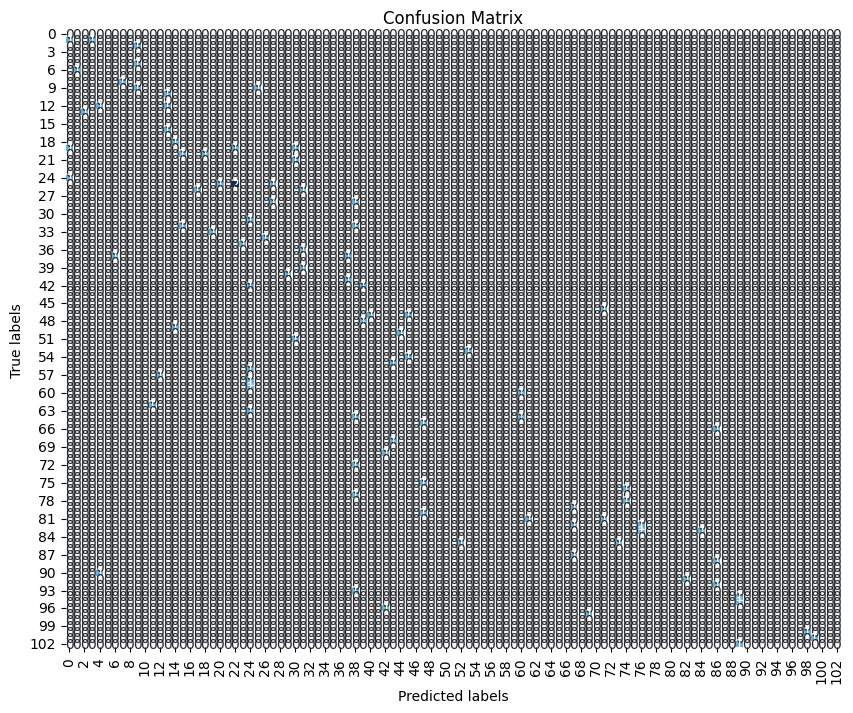

In [42]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [30]:
#Accuracy
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))


0.0425531914893617


In [31]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         158       0.00      0.00      0.00         0
         199       0.00      0.00      0.00         2
         211       0.00      0.00      0.00         1
         227       0.00      0.00      0.00         0
         231       0.00      0.00      0.00         0
         232       0.00      0.00      0.00         1
         237       0.00      0.00      0.00         1
         250       0.00      0.00      0.00         0
         252       0.00      0.00      0.00         1
         253       0.33      0.50      0.40         2
         261       0.00      0.00      0.00         1
         263       0.00      0.00      0.00         0
         273       0.00      0.00      0.00         2
         284       0.00      0.00      0.00         1
         295       0.00      0.00      0.00         0
         305       0.00      0.00      0.00         0
         307       0.00      0.00      0.00         1
         313       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

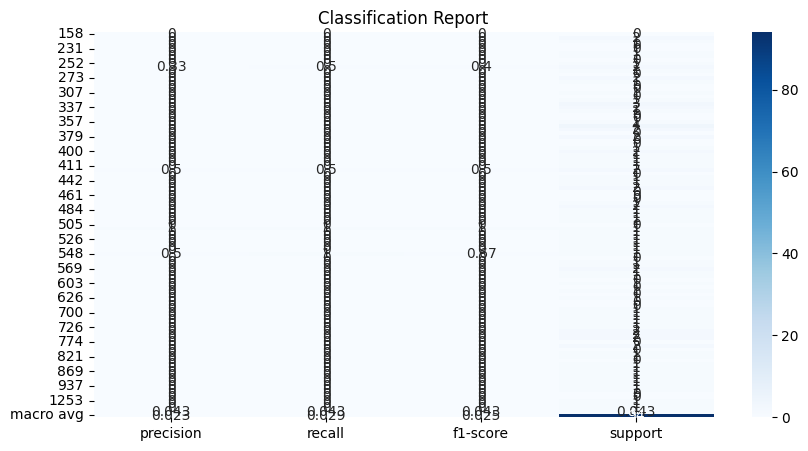

In [45]:
# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Plotting
plt.figure(figsize=(10, 5))
sns.heatmap(df_report.iloc[:-1, :].astype(float), annot=True, cmap="Blues")
plt.title('Classification Report')
plt.show()

In [33]:
# Making some real predictions
new_prediction = classifier.predict(sc.transform(np.array([[-0.25775, 0.725608, 0.0187845, -0.206688, -0.745665, 1.17924, 0.840852, -2.97799, 0.573857]])))
new_prediction_proba = classifier.predict_proba(sc.transform(np.array([[-0.25775, 0.725608, 0.0187845, -0.206688, -0.745665, 1.17924, 0.840852, -2.97799, 0.573857]])))[:, 1]

In [35]:
print(new_prediction)
print(new_prediction_proba)

[199]
[0.]


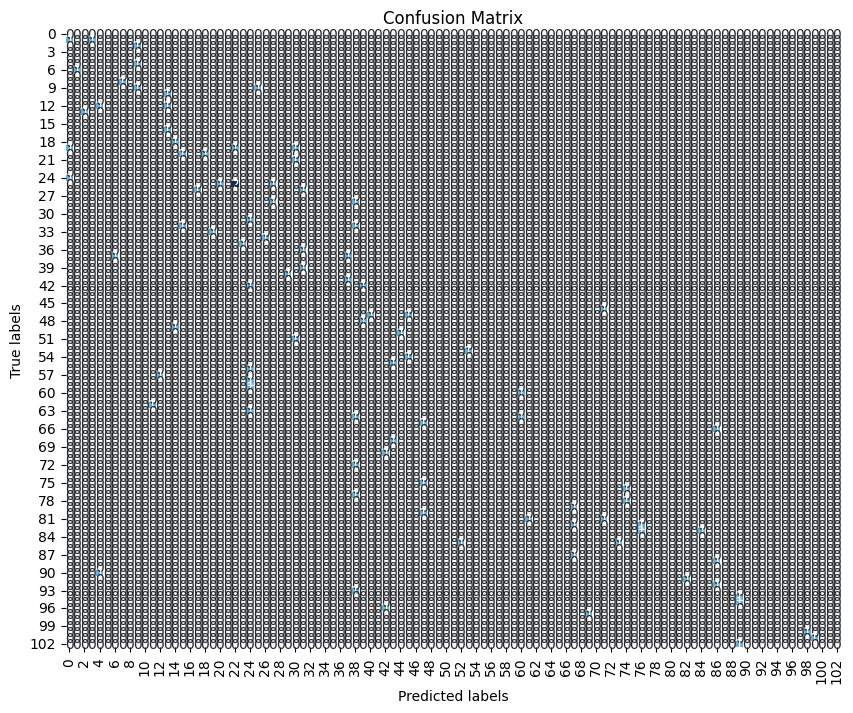

In [44]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [48]:
# Save the classifier
model_file = "classifier.pickle"
with open(model_file, 'wb') as file:
    pickle.dump(classifier, file)

# Save the scaler
scaler_file = "sc.pickle"
with open(scaler_file, 'wb') as file:
    pickle.dump(sc, file)

#  Save the X_test and y_test data for future use
testdata_file = "testdata.pickle"
with open(testdata_file, 'wb') as file:
    pickle.dump((X_test, y_test), file)